## Final Project Submission

Please fill out:
* Student name: Ryan Keats
* Student pace: self paced / part time / full time
* Scheduled project review date/time: July 2nd, 11:59pm
* Instructor name: Hardik Idnani
* Blog post URL:


In [1]:
# Imported any libraries to get started and that may help my coding along the way
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Loaded the original dataframe 
df1 = pd.read_csv("data/kc_house_data.csv")
# Set the display format for the easier reading of larger numbers
pd.options.display.float_format = '{:,.0f}'.format
# Displaying .head() function which returns the first 5 rows of the dataframe 
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900",3,1,1180,5650,1,NaN,0,...,7,1180,0.0,1955,0,98178,48,-122,1340,5650
1,6414100192,12/9/2014,"538,000",3,2,2570,7242,2,0,0,...,7,2170,400.0,1951,"1,991",98125,48,-122,1690,7639
2,5631500400,2/25/2015,"180,000",2,1,770,10000,1,0,0,...,6,770,0.0,1933,NaN,98028,48,-122,2720,8062
3,2487200875,12/9/2014,"604,000",4,3,1960,5000,1,0,0,...,7,1050,910.0,1965,0,98136,48,-122,1360,5000
4,1954400510,2/18/2015,"510,000",3,2,1680,8080,1,0,0,...,8,1680,0.0,1987,0,98074,48,-122,1800,7503


In [3]:
# Sorted the 'price' column from highest to lowest
sorted_df1 = df1.sort_values('price', ascending=False)
# Displaying .head() function
sorted_df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,"7,700,000",6,8,12050,27600,2,0,3,...,13,8570,3480.0,1910,"1,987",98102,48,-122,3940,8800
3910,9808700762,6/11/2014,"7,060,000",5,4,10040,37325,2,1,2,...,11,7680,2360.0,1940,"2,001",98004,48,-122,3930,25449
9245,9208900037,9/19/2014,"6,890,000",6,8,9890,31374,2,0,4,...,13,8860,1030.0,2001,0,98039,48,-122,4540,42730
4407,2470100110,8/4/2014,"5,570,000",5,6,9200,35069,2,0,0,...,13,6200,3000.0,2001,NaN,98039,48,-122,3560,24345
1446,8907500070,4/13/2015,"5,350,000",5,5,8000,23985,2,0,4,...,12,6720,1280.0,2009,0,98004,48,-122,4600,21750


In [4]:
# Returns each column in the original df1
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Retruns the data types of each column from the original df1
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# Returns the count of each unique values for each column from the original dataframe 
df1.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [7]:
# Returns comprehensive information of the original df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
# Checking for any duplicated data from the original dataframe 
duplicates = df1.duplicated()
if duplicates.any():
    print("There are duplicated values in the DataFrame.")
else:
    print("There are no duplicated values in the DataFrame.")
print(duplicates.value_counts())
# Count the number of duplicate rows
duplicate_count = df1.duplicated().sum()
# Display the count
print(f"Number of duplicate rows: {duplicate_count}")

There are no duplicated values in the DataFrame.
False    21597
dtype: int64
Number of duplicate rows: 0


In [9]:
# Returns the presence of missing values (NaN) as a boolean dataframe 
# Also displaying .head() function 
df1.isna().head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Returns a count of the missing values (NaN) in each column of the original DataFrame
df1.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
# Returns a descriptive analysis of the original dataframe
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597","21,597","21,597","21,597","21,597","21,597","21,597","19,221","21,534","21,597","21,597","21,597","21,597","17,755","21,597","21,597","21,597","21,597","21,597"
mean,"4,580,474,288","540,297",3,2,"2,080","15,099",1,0,0,3,8,"1,789","1,971",84,"98,078",48,-122,"1,987","12,758"
std,"2,876,735,716","367,368",1,1,918,"41,413",1,0,1,1,1,828,29,400,54,0,0,685,"27,274"
min,"1,000,102","78,000",1,0,370,520,1,0,0,1,3,370,"1,900",0,"98,001",47,-123,399,651
25%,"2,123,049,175","322,000",3,2,"1,430","5,040",1,0,0,3,7,"1,190","1,951",0,"98,033",47,-122,"1,490","5,100"
50%,"3,904,930,410","450,000",3,2,"1,910","7,618",2,0,0,3,7,"1,560","1,975",0,"98,065",48,-122,"1,840","7,620"
75%,"7,308,900,490","645,000",4,2,"2,550","10,685",2,0,0,4,8,"2,210","1,997",0,"98,118",48,-122,"2,360","10,083"
max,"9,900,000,190","7,700,000",33,8,"13,540","1,651,359",4,1,4,5,13,"9,410","2,015","2,015","98,199",48,-121,"6,210","871,200"


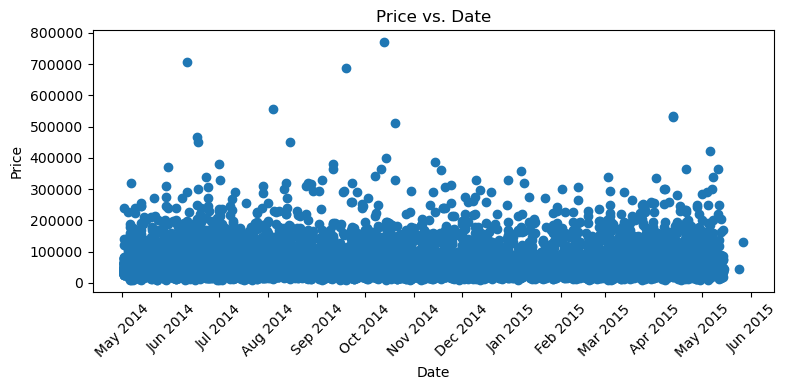

In [12]:
# Loaded the original dataframe and adjusted the price column 
df1 = pd.read_csv('data/kc_house_data.csv')
df1['price'] = df1['price'] / 10
# Converted the date column to datetime format
df1['date'] = pd.to_datetime(df1['date'])
# Created the scatter plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df1['date'], df1['price'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price vs. Date')
# Set x-axis tick locator and format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

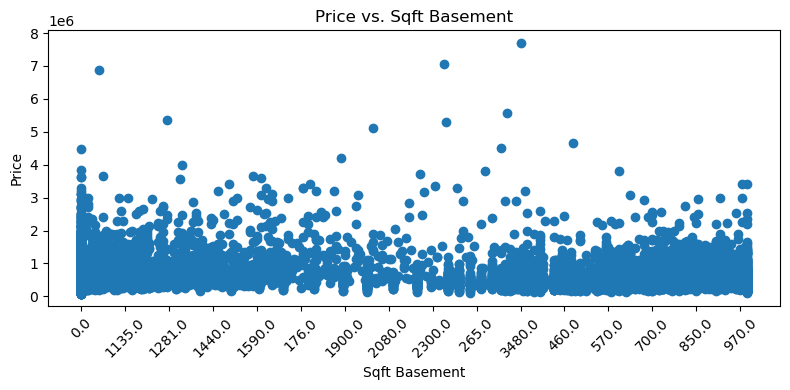

In [13]:
# Loaded the original dataframe & sort values from sqft_basement
df1 = pd.read_csv('data/kc_house_data.csv')
df1_sorted = df1.sort_values('sqft_basement')
# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df1_sorted['sqft_basement'], df1_sorted['price'])
ax.set_xlabel('Sqft Basement')
ax.set_ylabel('Price')
ax.set_title('Price vs. Sqft Basement')
# Set the number of desired intervals
num_intervals = 22
# Set x-axis tick locator for the desired number of intervals
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_intervals))
# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

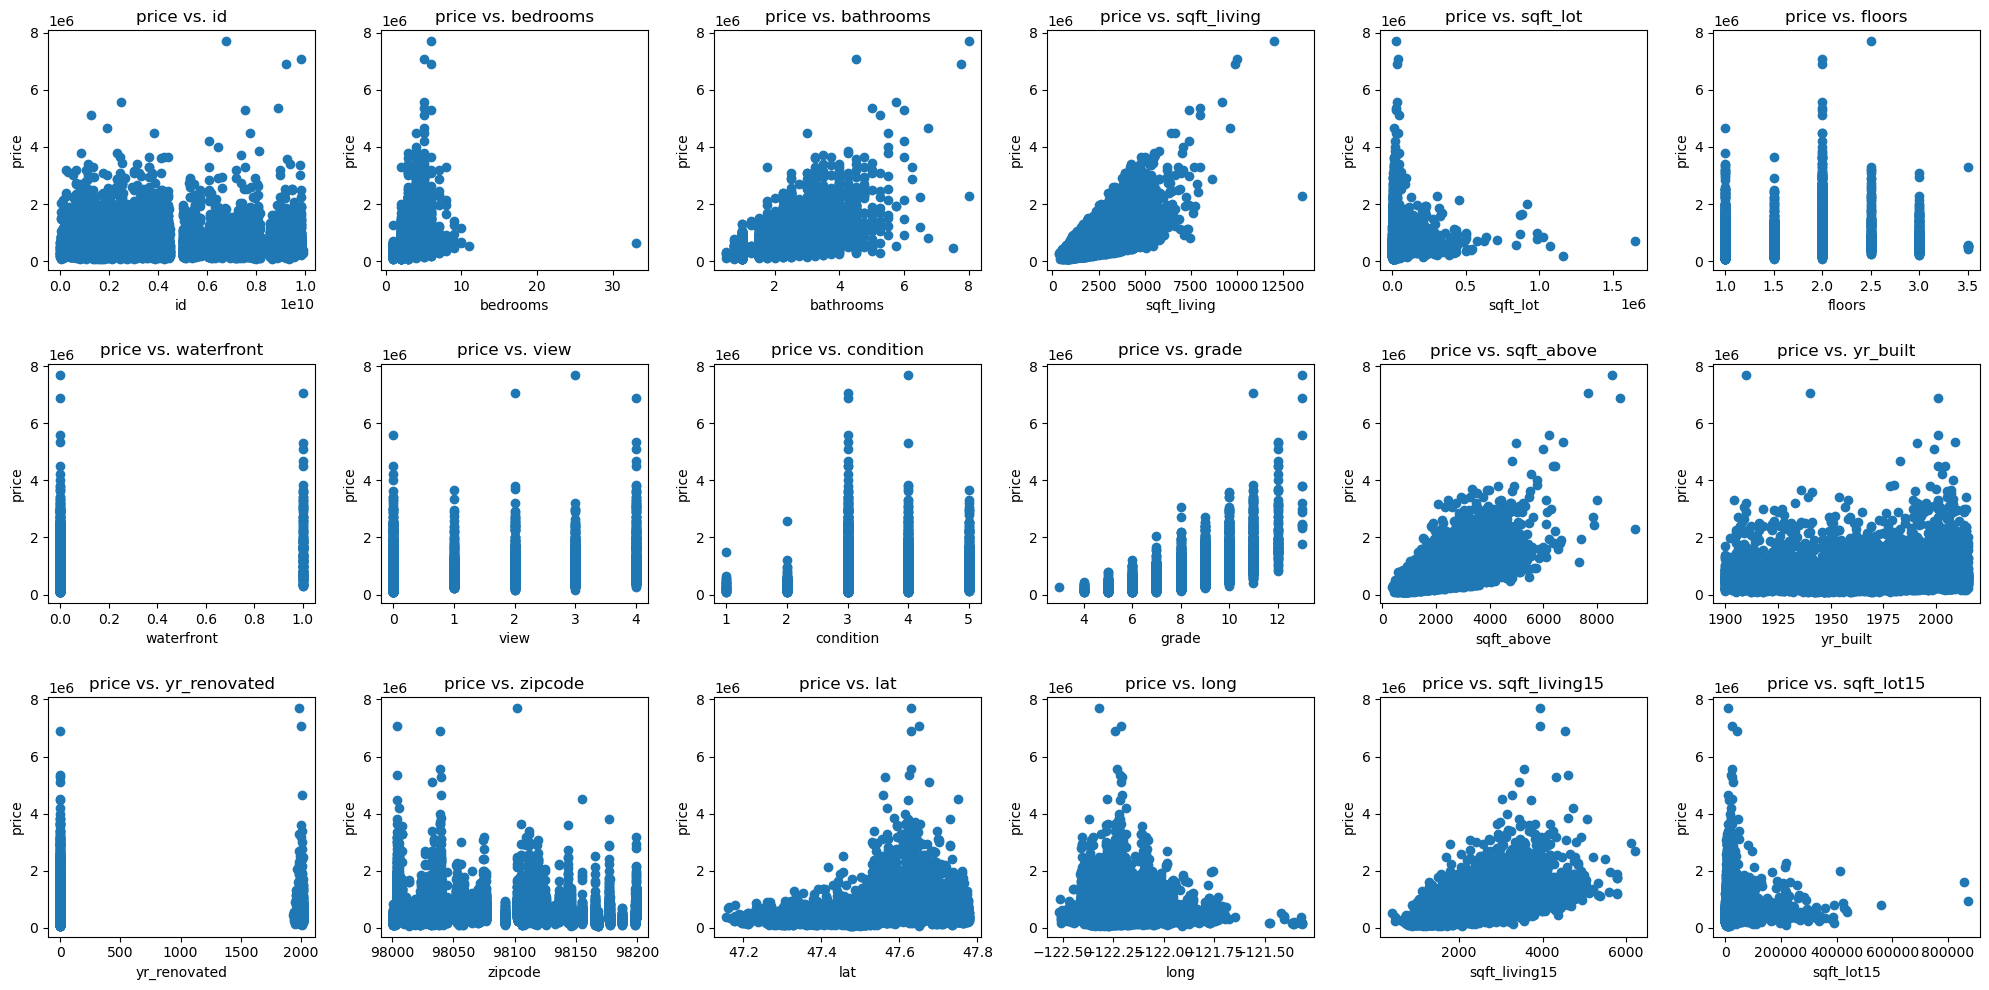

In [14]:
# Loaded the original dataframe
df1 = pd.read_csv('data/kc_house_data.csv')
# Set my Dependent variable
dependent_variable = 'price'
# Independent variables (I have removed 'date' & 'sqft_basement' as they were not readable on the axis of the plots)
independent_variables = ['id', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 
                         'waterfront', 'view', 'condition','grade', 'sqft_above', 'yr_built',
                         'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','sqft_lot15']
# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))
axes = axes.flatten()
# Create scatter plots for each independent variable
for i, independent_var in enumerate(independent_variables):
    axes[i].scatter(df1[independent_var], df1[dependent_variable])
    axes[i].set_xlabel(independent_var)
    axes[i].set_ylabel(dependent_variable)
    axes[i].set_title(f'{dependent_variable} vs. {independent_var}')
# Adjusted spacing between subplots
fig.tight_layout()
# Display the plots
plt.show()

In [15]:
# Cleaning dataframe by removing unwanted columns, removing NaN & outliers 
# Load the original dataset
df1 = pd.read_csv('data/kc_house_data.csv')
# Replace '?' values with NaN
df1.replace('?', np.nan, inplace=True)
# Drop rows with missing values
df1.dropna(inplace=True)
# Specify the columns to remove
cols_to_remove = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 
                  'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
# Drop the specified columns
df1 = df1.drop(columns=cols_to_remove)
# Calculate z-scores for each column
z_scores = np.abs((df1 - df1.mean()) / df1.std())
# Set a threshold for outlier detection (e.g., z-score > 3)
threshold = 3
# Remove rows with outlier values
df2 = df1[(z_scores < threshold).all(axis=1)]
# Specify the new filename
new_filename = ('data/cleaned_data.csv')
# Save the cleaned dataset as the new CSV file
df2.to_csv(new_filename, index=False)
# Display the updated dataframe after removing columns and outliers
df2.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,6414100192,"538,000",3,2,2570,7242,2,0,3,7,1951
3,2487200875,"604,000",4,3,1960,5000,1,0,5,7,1965
4,1954400510,"510,000",3,2,1680,8080,1,0,3,8,1987
8,2414600126,"229,500",3,1,1780,7470,1,0,3,7,1960
9,3793500160,"323,000",3,2,1890,6560,2,0,3,7,2003


In [16]:
# Returns each column from the updated df2
df2.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

In [17]:
# Returns shape of the updated df2
df2.shape

(14634, 11)

In [18]:
# Returns the data types of each column from the updated df2
df2.dtypes

id               int64
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
dtype: object

In [19]:
# Returns the count of each unique value for each column from the updated df2
df2.nunique()

id             14553
price           2856
bedrooms           6
bathrooms         16
sqft_living      744
sqft_lot        7284
floors             5
waterfront         1
condition          4
grade              7
yr_built         116
dtype: int64

In [20]:
# Returns comprehensive information of the updated df2_cleaned
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14634 entries, 1 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           14634 non-null  int64  
 1   price        14634 non-null  float64
 2   bedrooms     14634 non-null  int64  
 3   bathrooms    14634 non-null  float64
 4   sqft_living  14634 non-null  int64  
 5   sqft_lot     14634 non-null  int64  
 6   floors       14634 non-null  float64
 7   waterfront   14634 non-null  float64
 8   condition    14634 non-null  int64  
 9   grade        14634 non-null  int64  
 10  yr_built     14634 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.3 MB


In [21]:
# Returns a descriptive analysis of the updated df2
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,"14,634","14,634","14,634","14,634","14,634","14,634","14,634","14,634","14,634","14,634","14,634"
mean,"4,646,215,975","499,284",3,2,"2,000","10,691",1,0,3,8,"1,971"
std,"2,872,571,707","251,389",1,1,778,"13,647",1,0,1,1,29
min,"1,000,102","82,000",1,0,370,520,1,0,2,5,"1,900"
25%,"2,205,700,346","316,500",3,2,"1,410","5,000",1,0,3,7,"1,952"
50%,"4,014,400,214","440,750",3,2,"1,880","7,484",1,0,3,7,"1,974"
75%,"7,382,512,700","619,415",4,2,"2,470","10,138",2,0,4,8,"1,996"
max,"9,895,000,040","1,660,000",6,4,"4,800","139,392",3,0,5,11,"2,015"


In [22]:
# DataFrame is called df2 and the column I wanted to analyze is 'waterfront'
column_data_bool = df2['waterfront'].map({0: False, 1: True})
# Print the converted column data
column_data_bool
# Find the count of False and True values
value_counts = column_data_bool.value_counts()
# Display the count of False and True values
value_counts

False    14634
Name: waterfront, dtype: int64

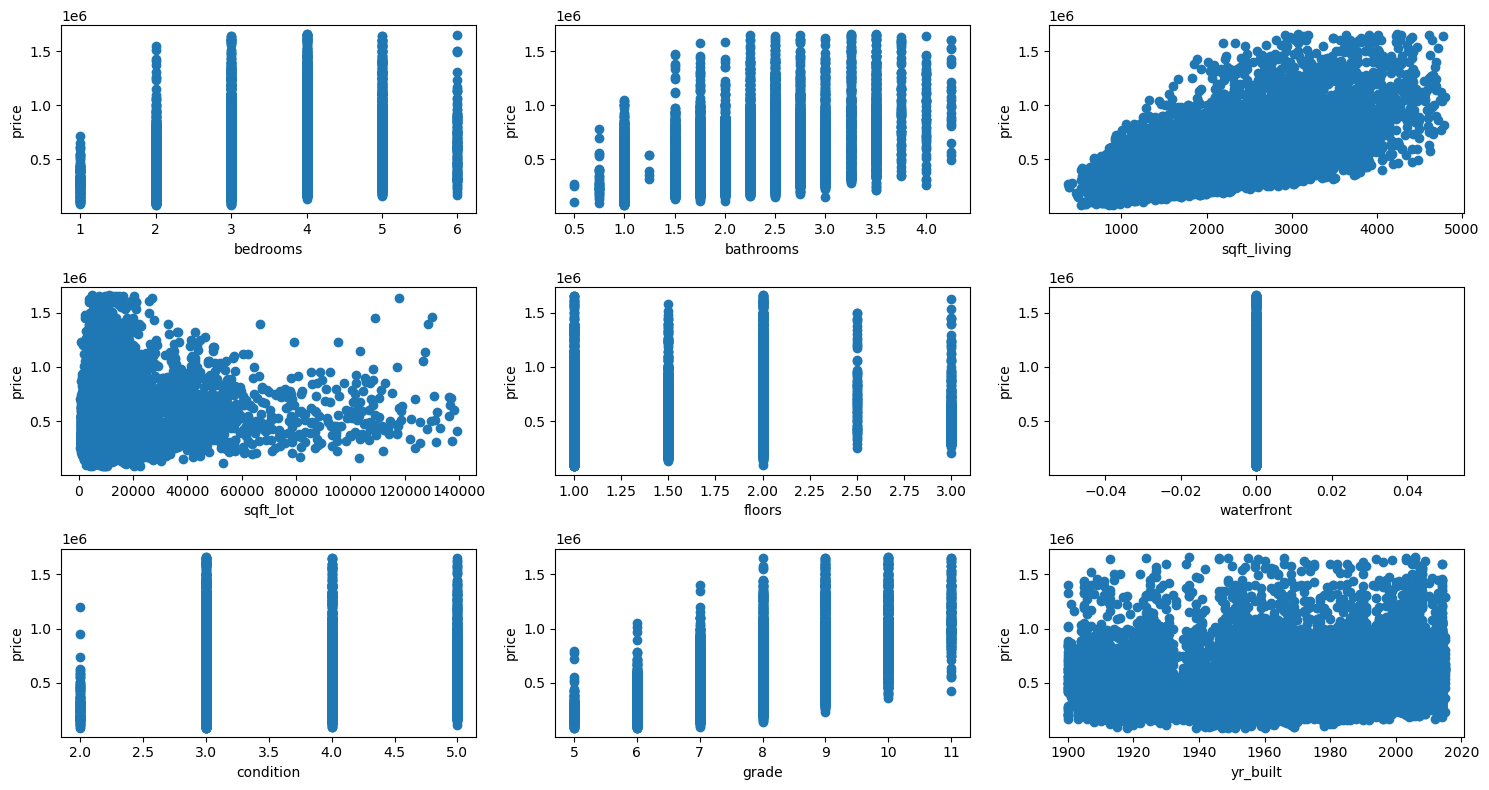

In [23]:
# Build scatter plots for each independent variable
ind_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
dep_var = 'price'
# Set the size of the overall figure
plt.figure(figsize=(15, 8))  
for i, var in enumerate(ind_vars, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df2[var], df2[dep_var])
    plt.xlabel(var)
    plt.ylabel(dep_var)
# Adjust the spacing between subplots
plt.tight_layout()
# Display the plots 
plt.show()

In [24]:
# Load the dataset
df2 = pd.read_csv('data/cleaned_data.csv')

continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
categoricals = ['waterfront', 'condition', 'grade', 'yr_built']

In [25]:
# Select the continuous variables for log transformation and normalization
continuous = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
# Log transform the selected continuous variables
log_names = [f'{column}_log' for column in continuous]
df2_log = np.log(df2[continuous])
df2_log.columns = log_names
# Normalize the log-transformed variables
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
df2_log_norm = df2_log.apply(normalize)

In [26]:
# Create dummy variables for categorical variables (waterfront, condition, grade, yr_built)
waterfront_dummies = pd.get_dummies(df2['waterfront'], prefix='waterfront')
condition_dummies = pd.get_dummies(df2['condition'], prefix='condition')
grade_dummies = pd.get_dummies(df2['grade'], prefix='grade')
yr_built_dummies = pd.get_dummies(df2['yr_built'], prefix='yr_built')

In [27]:
# Concatenate the log-transformed and normalized variables with the dummy variables
df2_processed = pd.concat([df2_log_norm, waterfront_dummies, condition_dummies, grade_dummies, yr_built_dummies], axis=1)
df2_processed.head()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,waterfront_0.0,condition_2,condition_3,condition_4,...,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015
0,0,-0,0,1,-0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,-1,-1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,-0,0,-0,0,-1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-1,-0,-2,-0,0,-1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-1,-0,1,0,-0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Define my dependent variable
y = df2_log_norm['price_log']
# Define my independent variables
X = df2_log_norm.drop('price_log', axis=1)

In [29]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     2144.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:12:37   Log-Likelihood:                -16741.
No. Observations:               14634   AIC:                         3.349e+04
Df Residuals:                   14628   BIC:                         3.354e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.684e-15      0.006  -2.68e-13      1.000      -0.012       0.012
bedrooms_log       -0.1456      0.008    -17.563      0.000      -0.162      -0.129
bathrooms_log      -0.0328      0.010     -3.226      0.001      -0.053      -0.013
sqft_living_log     0.7730      0.011     67.787      0.000       0.751       0.795
sqft_lot_log       -0.1230      0.007    -16.533      0.000      -0.138      -0.108
floors_log          0.0242      0.008      3.068      0.002       0.009       0.040
==============================================================================
Omnibus:                      112.743   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.784
Skew:                          -0.003   Prob(JB):                     3.50e-17
Kurtosis:                       2.648   Cond. No.                         3.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [31]:
# Coefficients
linreg.coef_

array([-0.14558336, -0.03275012,  0.77299725, -0.12304315,  0.02422383])

In [32]:
# Intercept
linreg.intercept_

-2.3905281022660536e-15

In [33]:
# Getting the used column names for the df
continuous.remove("price")
used_cols = [*continuous, *categoricals]
used_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'yr_built']

In [34]:
# Creating an empty dataframe for the new row
new_row = pd.DataFrame(columns=used_cols)

In [35]:
# Create an empty DataFrame to hold the new row
new_row = pd.DataFrame(columns=['bedrooms', 'bathrooms', 'sqft_living',
                                'sqft_lot', 'floors', 'waterfront',
                                'condition', 'grade', 'yr_built'])
# Calculate the mean and mode for each column
new_row['bedrooms'] = [df2['bedrooms'].mean()]
new_row['bathrooms'] = [df2['bathrooms'].mean()]
new_row['sqft_living'] = [df2['sqft_living'].mean()]
new_row['sqft_lot'] = [df2['sqft_lot'].mean()]
new_row['floors'] = [df2['floors'].mean()]
new_row['waterfront'] = [df2['waterfront'].mode()[0]]
new_row['condition'] = [df2['condition'].mode()[0]]
new_row['grade'] = [df2['grade'].mode()[0]]
new_row['yr_built'] = [df2['yr_built'].mean()]
# Display the new row
new_row

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,3,2,"2,000","10,691",1,0,3,7,"1,971"


In [36]:
# Concatenate the new row with the existing DataFrame
df2_with_new_row = pd.concat([df2, new_row], ignore_index=True)
# First, we'll tackle the continuous columns
new_row_cont = new_row[continuous]
# Log transform the features
log_names = [f'{column}_log' for column in new_row_cont.columns]
new_row_log = np.log(new_row_cont.astype(float))  
new_row_log.columns = log_names
# Normalize the log-transformed features
for col in continuous:
    new_row_log[f'{col}_log'] = (new_row_log[f'{col}_log'] - df2[col].mean()) / df2[col].std()
new_row_log

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log
0,-2,-2,-3,-1,-2


In [37]:
# Now for the categoricals
new_row_cat = new_row[categoricals]
new_row_df2 = pd.DataFrame(columns=df2.columns)
# Using complicated for loops to one-hot encode the new row
df2_dict = {}
for col_type in new_row_cat.columns:
    col_list = [c for c in new_row_df2.columns.to_list() if col_type in str(c)]
    for x in col_list:
        if str(new_row_cat[col_type][0]) in str(x):
            df2_dict[x] = 1
        else:
            df2_dict[x] = 0
# Putting the results in a dataframe
new_row_df2 = pd.concat([new_row_df2, pd.DataFrame([df2_dict])], ignore_index=True)
# Display the new_row_df2 DataFrame
new_row_df2

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [38]:
# Putting together this row's data, both continuous and categorical
new_row_processed = pd.concat([new_row_log, new_row_df2], axis=1)
new_row_processed

,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,-2,-2,-3,-1,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [39]:
# Accessing the dtypes attribute of the new_row_processed dataframe
new_row_processed.dtypes

bedrooms_log       float64
bathrooms_log      float64
sqft_living_log    float64
sqft_lot_log       float64
floors_log         float64
id                  object
price               object
bedrooms            object
bathrooms           object
sqft_living         object
sqft_lot            object
floors              object
waterfront          object
condition           object
grade               object
yr_built            object
dtype: object

In [40]:
# Predicting the target variable using the trained linear regression model
new_row_pred_log = linreg.predict(new_row_processed[['bedrooms_log', 'bathrooms_log', 'sqft_living_log', 'sqft_lot_log', 'floors_log']])
new_row_pred_log

array([-1.50679377])

In [41]:
# Prediction needs to be scaled and exponentiated
np.exp(new_row_pred_log) * df2['price'].std() + df2['price'].mean()

array([554996.60025855])

In [42]:
# Set the plot style
plt.style.use('ggplot')
# Load the data from 'advertising.csv' with the first column as the index
df2 = pd.read_csv('data/cleaned_data.csv', index_col=0)
# Check the columns and first few rows
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,,
6414100192,"538,000",3,2,2570,7242,2,0,3,7,1951
2487200875,"604,000",4,3,1960,5000,1,0,5,7,1965
1954400510,"510,000",3,2,1680,8080,1,0,3,8,1987
2414600126,"229,500",3,1,1780,7470,1,0,3,7,1960
3793500160,"323,000",3,2,1890,6560,2,0,3,7,2003


In [43]:
# Returns the statistics for data 
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,"14,634","14,634","14,634","14,634","14,634","14,634","14,634","14,634","14,634","14,634"
mean,"499,284",3,2,"2,000","10,691",1,0,3,8,"1,971"
std,"251,389",1,1,778,"13,647",1,0,1,1,29
min,"82,000",1,0,370,520,1,0,2,5,"1,900"
25%,"316,500",3,2,"1,410","5,000",1,0,3,7,"1,952"
50%,"440,750",3,2,"1,880","7,484",1,0,3,7,"1,974"
75%,"619,415",4,2,"2,470","10,138",2,0,4,8,"1,996"
max,"1,660,000",6,4,"4,800","139,392",3,0,5,11,"2,015"


In [44]:
# This DataFrame contains information about houses, including their price, number of bedrooms and bathrooms, square footage of the living area and lot, number of floors, waterfront view (if any), condition rating, grade, and year built.

# The prices of houses range from $82,000 to $1,660,000, with an average price of $499,284.
# Houses have an average of 3 bedrooms and 2 bathrooms.
# The living area ranges from 370 to 4,800 square feet, with an average of 2,000 square feet.
# The lot size ranges from 520 to 139,392 square feet, with an average of 10,691 square feet.
# Most houses have 1 floor, with a minimum of 1 and a maximum of 3 floors.
# None of the houses in the dataset have a waterfront view.
# The houses have a condition rating ranging from 2 to 5, with an average rating of 3.
# The grade of houses ranges from 5 to 11, with an average grade of 8.
# The houses were built between 1900 and 2015, with an average year of construction of 1971.

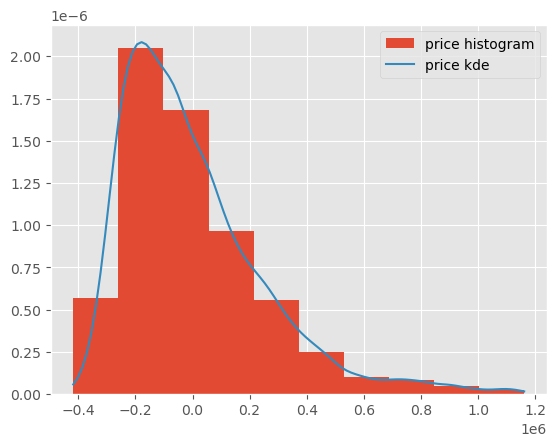

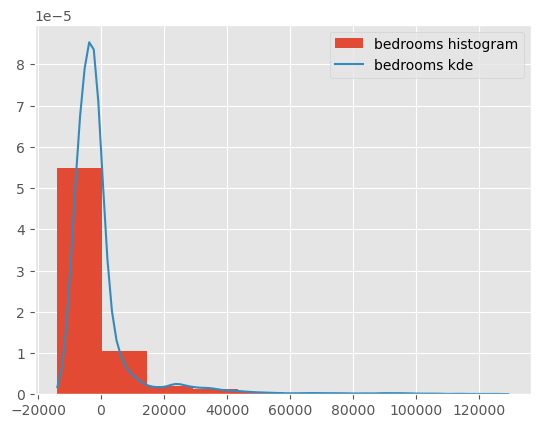

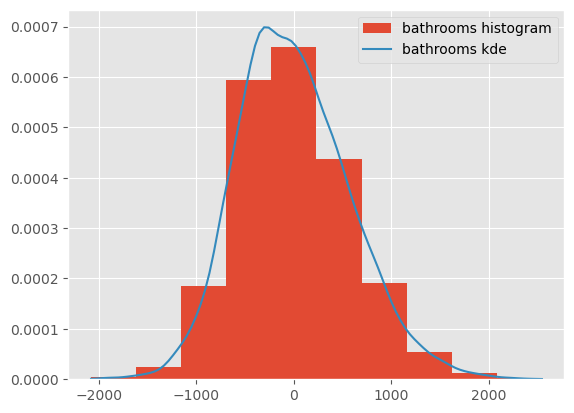

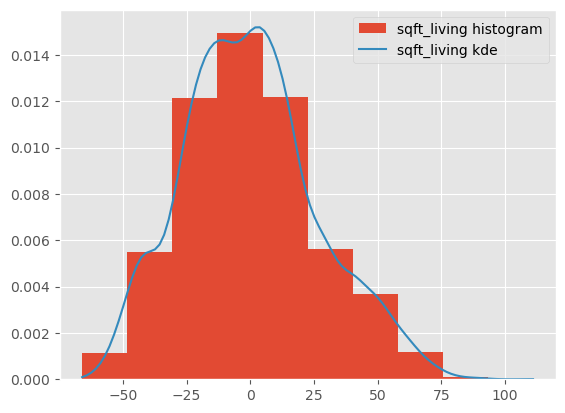

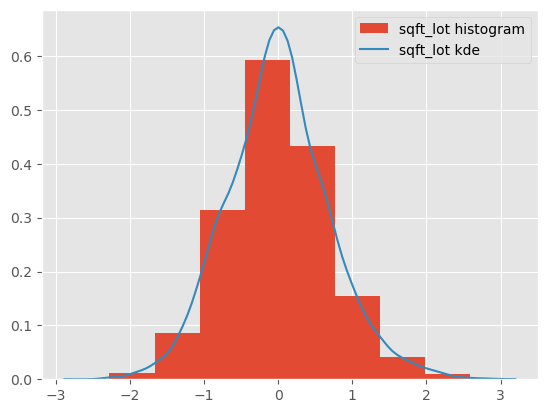

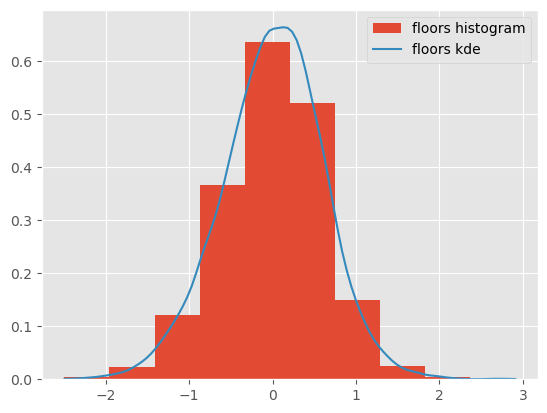

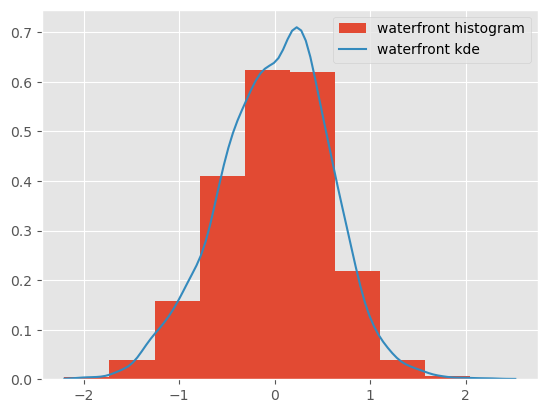

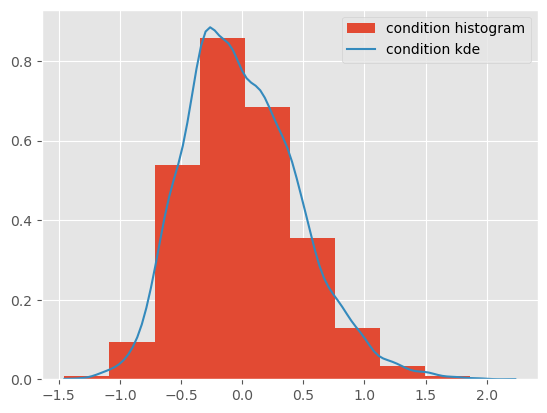

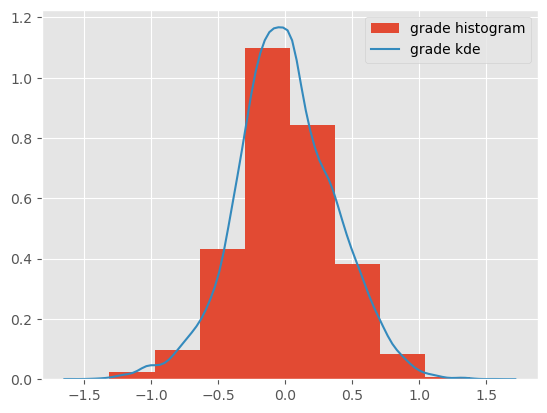

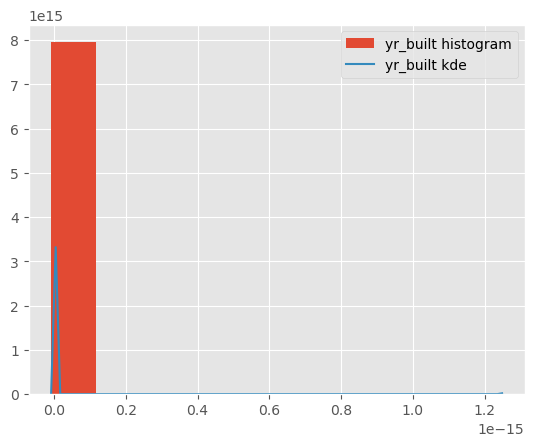

In [45]:
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde
# Perform PCA
pca = PCA()
df2_transformed = pca.fit_transform(df2)
# Plot histograms with KDE for each column
for column in df2.columns:
    plt.figure()
    plt.hist(df2_transformed[:, df2.columns.get_loc(column)], density=True, label=column+' histogram')
    x_values = np.linspace(np.min(df2_transformed[:, df2.columns.get_loc(column)]), np.max(df2_transformed[:, df2.columns.get_loc(column)]), 100)
    y_values = gaussian_kde(df2_transformed[:, df2.columns.get_loc(column)])(x_values)
    plt.plot(x_values, y_values, label=column+' kde')
    plt.legend()
    plt.show()

In [46]:
# Recording my observations here 

# While none of the variables exhibit a symetrical distribution. 
# Majority of them display a pattern that resembles a normal distribution.
# Bathrooms, sqft_living, sqft-lot, floors, waterfront, condition & grade are the closest to a normal distribution. 
# Bedrooms is showing a positive skew.
# My target variable of price is positively skewed, although it is showing signs of normal distribtion.

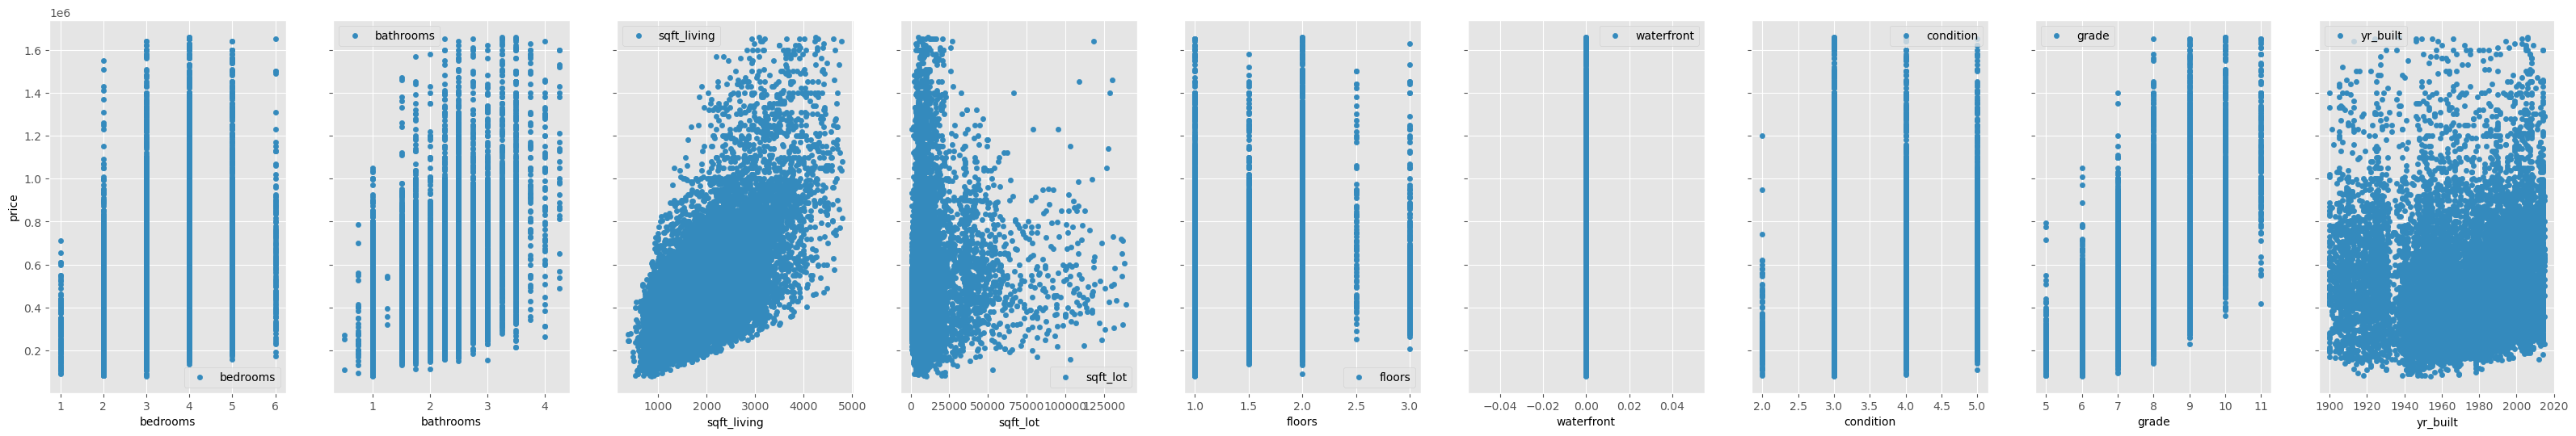

In [47]:
# Visualize the relationship between predictors and the target using scatter plots
fig, axs = plt.subplots(1, len(df2.columns)-1, sharey=True, figsize=(40, 6))
pred_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                  'floors', 'waterfront', 'condition', 'grade', 'yr_built']
target_var = 'price'
for idx, predictor in enumerate(pred_vars):
    df2.plot(kind='scatter', x=predictor, y=target_var, ax=axs[idx], label=predictor)
plt.legend()
plt.show()

In [48]:
# Recording my observations on linearity here 

# sqft_living is showing the closest positve linear relationship with price 
# although is still showing strong variance.

# No variables are showing any strong postive linear relationships with price. 

# Yr_built is showing far too much variance &
# clearly shows no linear relationship with price. 

# No variable is showing a negative correlation, even though they are showing large variances.

In [49]:
# build the formula 
f = 'price~bedrooms'
# create a fitted model in one line
model = smf.ols(formula=f, data=df2).fit()

In [50]:
# Display model summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1589.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:12:45   Log-Likelihood:            -2.0198e+05
No. Observations:               14634   AIC:                         4.040e+05
Df Residuals:                   14632   BIC:                         4.040e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.914e+05   7969.942     24.020      0.000    1.76e+05    2.07e+05
bedrooms    9.208e+04   2309.592     39.868      0.000    8.76e+04    9.66e+04
==============================================================================
Omnibus:                     3369.024   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7808.991
Skew:                           1.298   Prob(JB):                         0.00
Kurtosis:                       5.463   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Recording my observations on "Goodness of fit" here

# The R-squared value in the given results is 0.098, indicates that the number of bedrooms 
# accounts for approximately 9.8% of the price variability in the real estate market.

# The intercept value of approximately $191,400 is the estimated price without any bedrooms, which isn't realistic. 
# It doesn't give you the price of a one bedroom house. To estimate the price of a one bedroom house use the intercept.
# Then add the coefficient of approximately $92,080 for the each additional bedroom.

# On average each additional bedroom corresponds to a price increase of approximately $92,080.

   bedrooms
0         1
1         6
0   283,514
1   743,910
dtype: float64


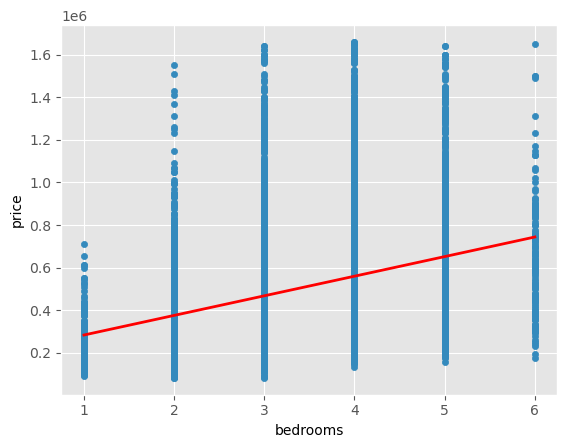

In [52]:
# Create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'bedrooms': [df2.bedrooms.min(), df2.bedrooms.max()]})
print(X_new.head())
# Make predictions for those x values and store them
preds = model.predict(X_new)
print(preds)
# First, plot the observed data and the least squares line
df2.plot(kind='scatter', x='bedrooms', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

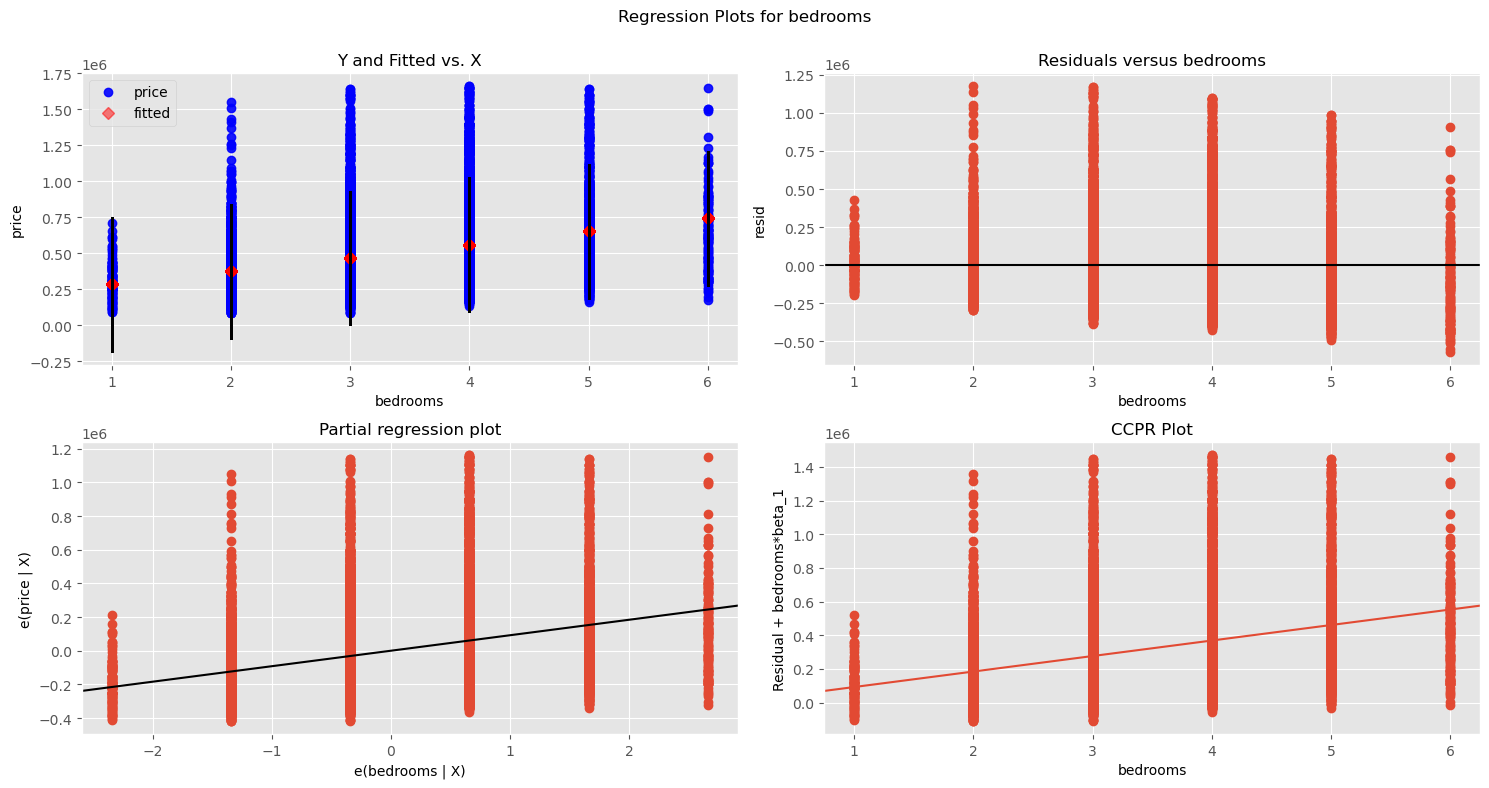

In [53]:
# Create a new figure object with a specific size
fig = plt.figure(figsize=(15, 8))
# Plot the regression relationship between 'bedrooms' and the dependent variable
fig = sm.graphics.plot_regress_exog(model, 'bedrooms', fig=fig)
# Display the plot 
plt.show()

In [54]:
# Recording my observations on heteroscedasticity

# These plots show neither concept of heteroscedasticity or homoscedasticity 
# but rather suggest a lack of variability in the residuals

# I have observed vertical lines in the scatter plot of residuals against predicted values for my baseline model,
# It indicates a problem. It suggests that there is no variability in the residuals, which is not good. 
# To properly evaluate my model, I need to see variability in the residuals. 
# I should investigate and address this issue to enhance the reliability of my baseline model in my later iterations. 

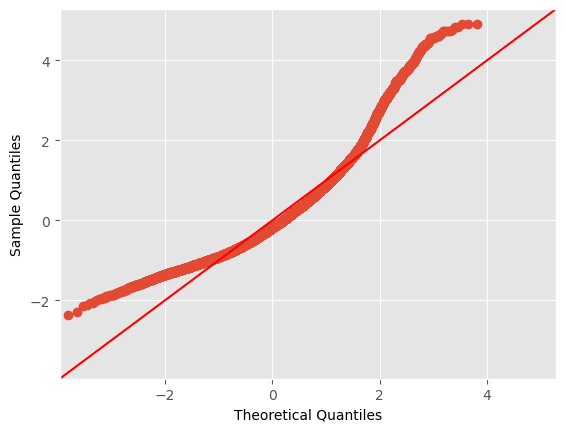

In [55]:
# Get the residuals from the regression model
residuals = model.resid
# Create a Q-Q plot to assess the normality of the residuals
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
# Display the Q-Q plot
plt.show()

In [56]:
# Recording my observations to assess the normality assumption. 

# The upward curvature seen here indicate heavier tails in the data distribution.

R-Squared: 0.22220708929223398
Intercept   148,478
bathrooms   169,557
dtype: float64


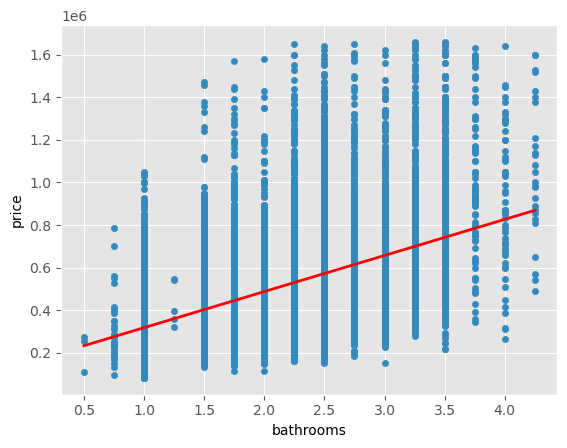

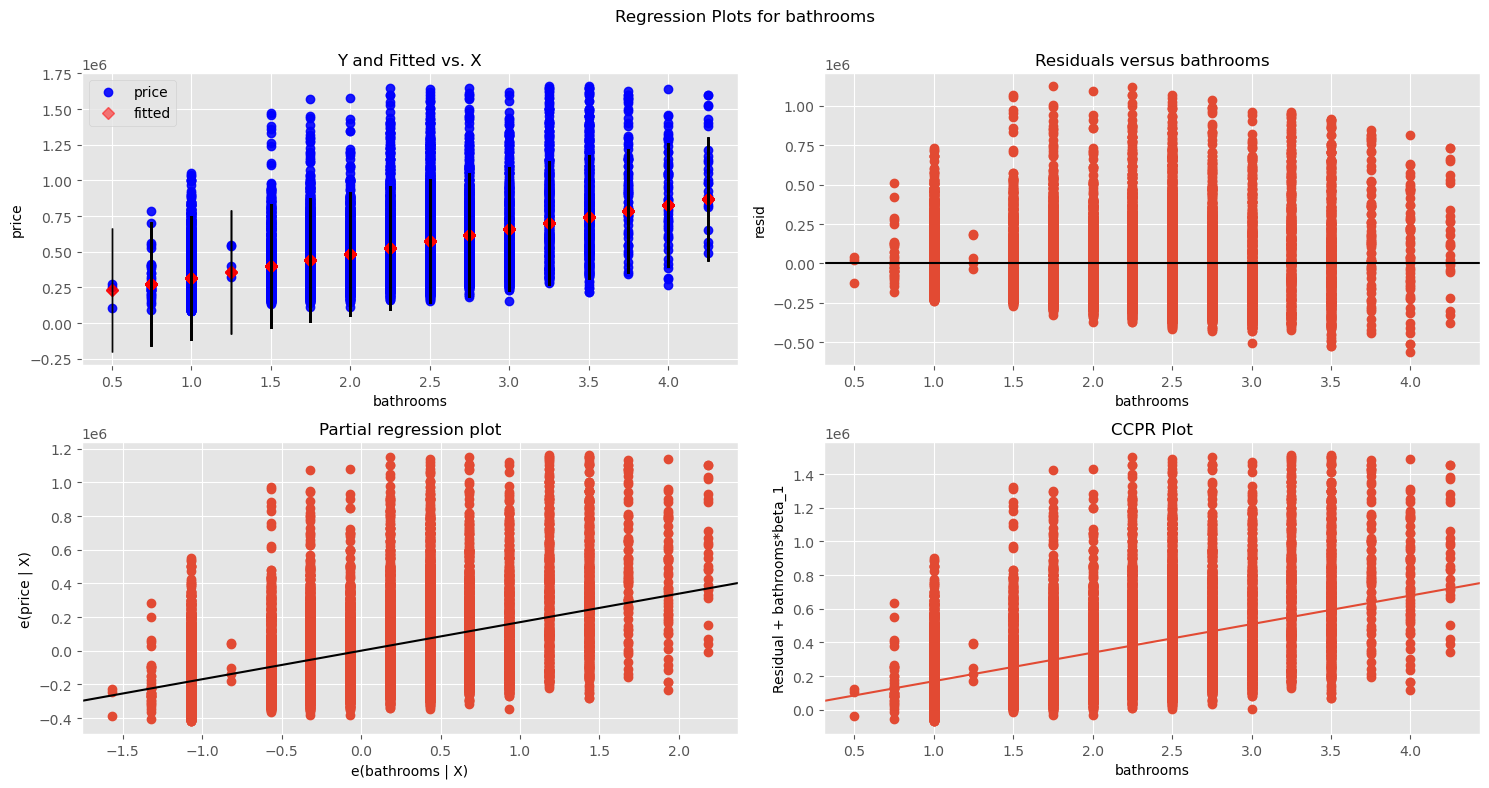

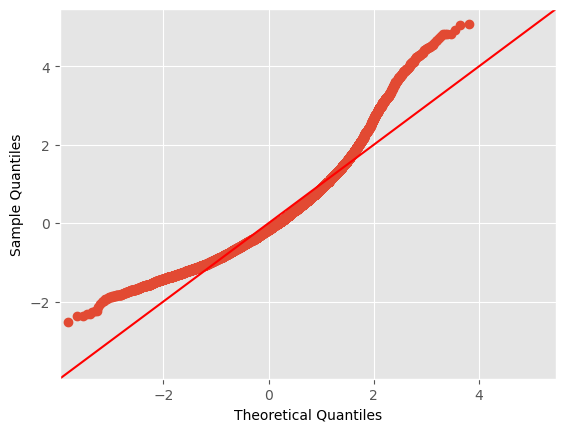

In [57]:
f = 'price~bathrooms'
model = smf.ols(formula=f, data=df2).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'bathrooms': [df2.bathrooms.min(), df2.bathrooms.max()]});
preds = model.predict(X_new)
df2.plot(kind='scatter', x='bathrooms', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'bathrooms', fig=fig)
plt.show()
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [58]:
# Display model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     4180.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:12:50   Log-Likelihood:            -2.0090e+05
No. Observations:               14634   AIC:                         4.018e+05
Df Residuals:                   14632   BIC:                         4.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.485e+05   5727.034     25.926      0.000    1.37e+05     1.6e+05
bathrooms   1.696e+05   2622.514     64.655      0.000    1.64e+05    1.75e+05
==============================================================================
Omnibus:                     2941.229   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6229.384
Skew:                           1.178   Prob(JB):                         0.00
Kurtosis:                       5.159   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Recording my observations here for goodness of fit 

# Bathrooms is a better predictor for the price of properties than bedrooms. 

# This model explains approximately 22.2% of the variation in the price of the properties.
# The number of bathrooms shows a positive relationship with the price of properties.
# The intercept represents the baseline price when the number of bathrooms is zero.
# The model's assumptions are not satisfied according to the statistical tests, 
# indicating potential issues with the model's fit.

In [60]:
# After analysis the number of bathrooms and bedrooms are not ideal predictors for property prices. 
# While the number of bathrooms performs slightly better than bedrooms in explaining price variance, 
# both predictors have limited effectiveness in capturing the full variation in property prices. 
# Other factors may play a significant role in determining property prices.